In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

{-180.0: ([<matplotlib.lines.Line2D at 0x1c46ea90>],
   <matplotlib.text.Text at 0x1c494780>]),
 -120.0: ([<matplotlib.lines.Line2D at 0x1c4792e8>],
  [<matplotlib.text.Text at 0x1c494cc0>]),
 -60.0: ([<matplotlib.lines.Line2D at 0x1c479ac8>],
  [<matplotlib.text.Text at 0x1c4a8240>]),
 0.0: ([<matplotlib.lines.Line2D at 0x1c47f2e8>],
  [<matplotlib.text.Text at 0x1c4a8780>]),
 60.0: ([<matplotlib.lines.Line2D at 0x1c47fac8>],
  [<matplotlib.text.Text at 0x1c4a8cc0>]),
 120.0: ([<matplotlib.lines.Line2D at 0x1c48f2e8>],
  [<matplotlib.text.Text at 0x1c4ad240>]),
 180.0: ([<matplotlib.lines.Line2D at 0x1c48fac8>],
   <matplotlib.text.Text at 0x1c4adcc0>])}

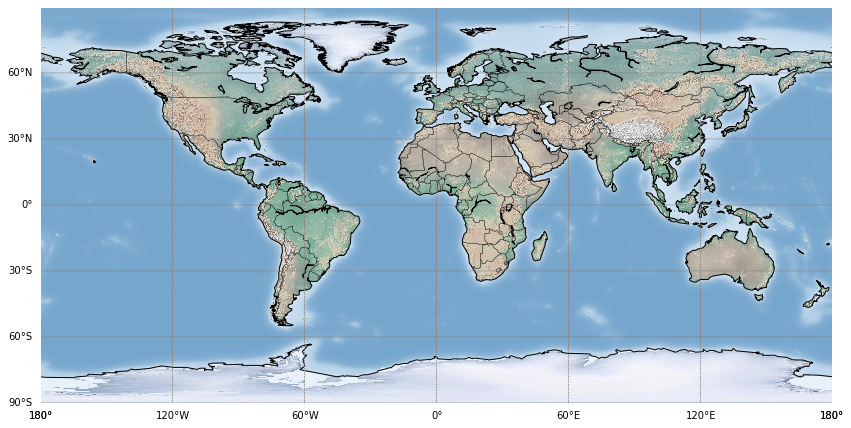

In [2]:
from mpl_toolkits.basemap import Basemap 
fig = plt.figure(figsize=(11,10)) 
ax = fig.add_axes([0,0,1,1]) 
map = Basemap(projection='cyl', resolution='c') 
map.shadedrelief() 
map.drawcoastlines() 
map.drawcountries() 
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],  
                  color='grey') 
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),  
                  labels=[0,0,0,1], color='grey') 

In [3]:
plt.style.available

['seaborn-bright',
 'classic',
 'seaborn-poster',
 'dark_background',
 'grayscale',
 'seaborn-ticks',
 'seaborn-deep',
 'seaborn-pastel',
 'seaborn-colorblind',
 'seaborn-paper',
 'ggplot',
 'seaborn-white',
 'seaborn-talk',
 'seaborn-muted',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-darkgrid',
 'bmh',
 'seaborn-notebook',
 'seaborn-dark-palette']

In [4]:

matplotlib.style.use('fivethirtyeight')

In [5]:
cols = ['user_id','item_id','rating','timestamp']

In [7]:
dfratings = pd.read_csv('Chapter 1/data/ratings.dat', sep='::',
                       index_col=False, names=cols, encoding='UTF-8')

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [9]:
dfratings[:5]

,user_id,item_id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639
2,2,104257,8,1364690142
3,2,1259521,8,1364118447
4,2,1991245,7,1364117717


In [10]:
ratings_counts = dfratings['rating'].value_counts()

In [11]:

ratings_counts

8     12012
7     11063
9      7119
6      6373
10     6281
5      3399
4      1696
3       924
1       595
2       533
0         5
Name: rating, dtype: int64

In [12]:

sorted_counts = ratings_counts.sort_index()
sorted_counts

0         5
1       595
2       533
3       924
4      1696
5      3399
6      6373
7     11063
8     12012
9      7119
10     6281
Name: rating, dtype: int64

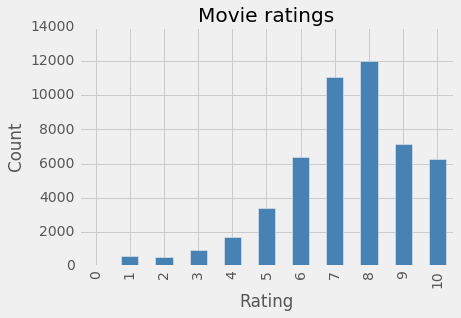

In [13]:
sorted_counts.plot(kind='bar', color='SteelBlue');
plt.title('Movie ratings');
plt.xlabel('Rating');
plt.ylabel('Count');

# http://matplotlib.org/examples/color/named_colors.html

In [14]:
cols = ['movie_id', 'movie_title','genre']
dfmovies = pd.read_csv('Chapter 1/data/movies.dat',
                      sep='::',index_col=False, names=cols, 
                      encoding="UTF-8")

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


In [15]:
dfmovies.head()

,movie_id,movie_title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short
2,7264,The Rink (1916),Comedy|Short
3,8133,The Immigrant (1917),Short|Comedy|Drama|Romance
4,9968,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance


In [16]:
dfmovies.genre.value_counts()


Drama                                                     696
Comedy                                                    391
Comedy|Drama                                              302
Comedy|Drama|Romance                                      227
Drama|Romance                                             226
Comedy|Romance                                            204
Documentary                                               199
Horror|Thriller                                           154
Horror                                                    151
Crime|Drama|Thriller                                      134
Drama|Thriller                                            113
Crime|Drama                                               102
Action|Crime|Thriller                                      89
Thriller                                                   87
Action|Crime|Drama|Thriller                                78
Horror|Mystery|Thriller                                    72
Crime|Dr

In [17]:
drama = dfmovies[dfmovies.genre == 'Crime|Drama']


In [18]:
drama_ids = drama['movie_id']

In [19]:
criterion = dfratings['item_id'].map(lambda x:(drama_ids == x).any())
drama_ratings = dfratings[criterion]

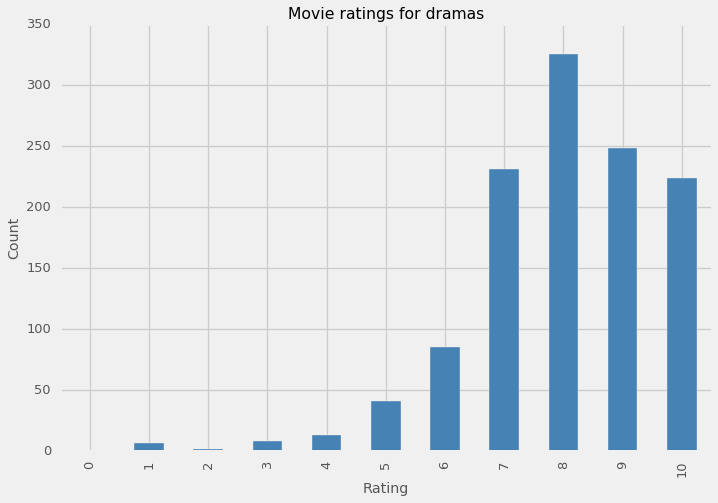

In [22]:
matplotlib.style.use('seaborn-talk')
rating_counts = drama_ratings['rating'].value_counts()
sorted_counts = rating_counts.sort_index()
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings for dramas')
plt.xlabel('Rating')
plt.ylabel('Count')

In [23]:

gss_data = pd.read_stata('GSS2014merged_stata/GSS2014merged_R4a.dta',
                        convert_categoricals=False)

In [24]:
gss_data.head()


,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,prestg10,...,clsgayw,othgayw,clsnjobm,othnjobm,clsnjobw,othnjobw,clspolm,othpolm,clspolw,othpolw
0,2014,1,1.0,60.0,NaN,NaN,1.0,2.0,220.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,2,1.0,40.0,NaN,NaN,2.0,2.0,700.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,3,4.0,NaN,NaN,NaN,2.0,2.0,8740.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,4,2.0,20.0,NaN,NaN,2.0,2.0,50.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,5,5.0,NaN,NaN,1.0,2.0,1.0,800.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
gss_data.set_index('id')
gss_data.drop('id',1,inplace=True)

In [26]:
gss_data.to_csv('GSS2014merged.csv')


In [27]:
gss_data.shape


(3842, 968)

In [28]:
gss_data.columns

Index(['year', 'wrkstat', 'hrs1', 'hrs2', 'evwork', 'wrkslf', 'wrkgovt',
       'occ10', 'prestg10', 'prestg105plus',
       ...
       'clsgayw', 'othgayw', 'clsnjobm', 'othnjobm', 'clsnjobw', 'othnjobw',
       'clspolm', 'othpolm', 'clspolw', 'othpolw'],
      dtype='object', length=968)

In [29]:
'age' in gss_data.columns

True

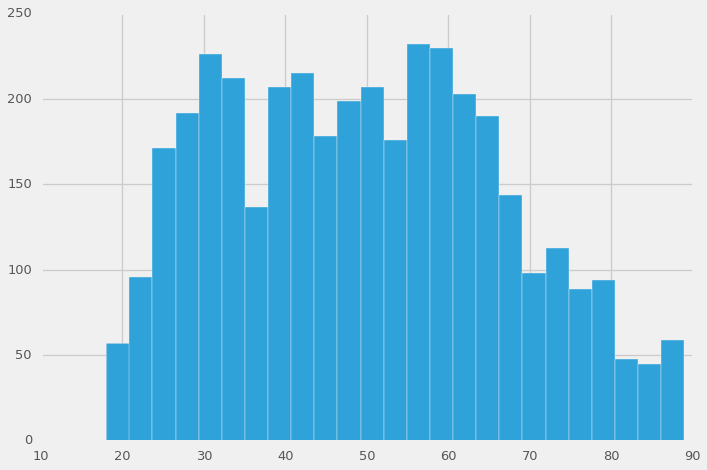

In [31]:
gss_data.age.hist(bins=25);


In [32]:
inc_age = gss_data[['realrinc','age']]
inc_age.head(10)

,realrinc,age
0,39022.50000,53.0
1,39022.50000,26.0
2,NaN,59.0
3,6503.75000,56.0
4,NaN,74.0
5,132148.07386,56.0
6,NaN,63.0
7,15372.50000,34.0
8,NaN,37.0
9,21285.00000,30.0


In [33]:
inc_age = gss_data[['realrinc','age']].dropna()
inc_age.head(10)

,realrinc,age
0,39022.50000,53.0
1,39022.50000,26.0
3,6503.75000,56.0
5,132148.07386,56.0
7,15372.50000,34.0
9,21285.00000,30.0
13,11233.75000,40.0
14,13007.50000,25.0
15,11233.75000,56.0
16,39022.50000,51.0


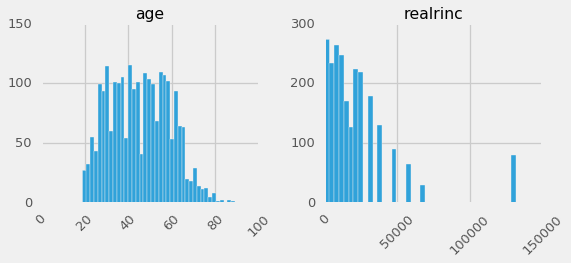

In [34]:
ax_list = inc_age.hist(bins=40, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [35]:
inc_age[inc_age.realrinc > 100000].count()


realrinc    80
age         80
dtype: int64

In [36]:
inc_age[inc_age.realrinc > 100000].head()

,realrinc,age
5,132148.07386,56.0
17,132148.07386,46.0
66,132148.07386,65.0
67,132148.07386,57.0
77,132148.07386,58.0


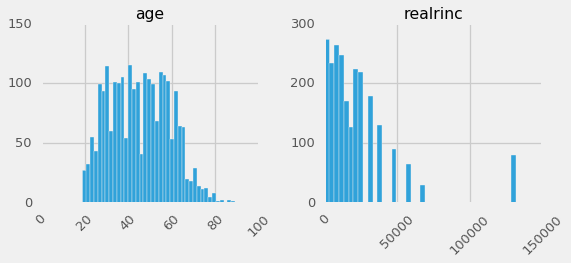

In [37]:
ax_list = inc_age.hist(bins=40, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [38]:
inc_age[inc_age.realrinc > 100000].count()

realrinc    80
age         80
dtype: int64

In [39]:
inc_age[inc_age.realrinc > 100000].head(10)

,realrinc,age
5,132148.07386,56.0
17,132148.07386,46.0
66,132148.07386,65.0
67,132148.07386,57.0
77,132148.07386,58.0
127,132148.07386,38.0
136,132148.07386,61.0
217,132148.07386,46.0
231,132148.07386,69.0
241,132148.07386,51.0


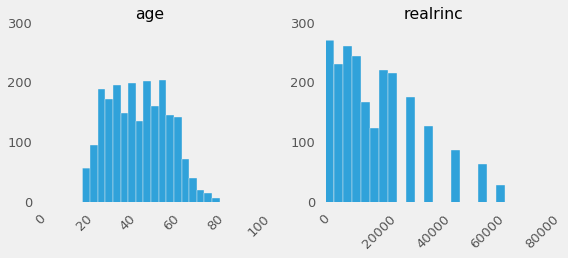

In [40]:
inc_age = gss_data[['realrinc','age']].dropna()
lowinc_age = inc_age[inc_age.realrinc < 1.0E5]
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

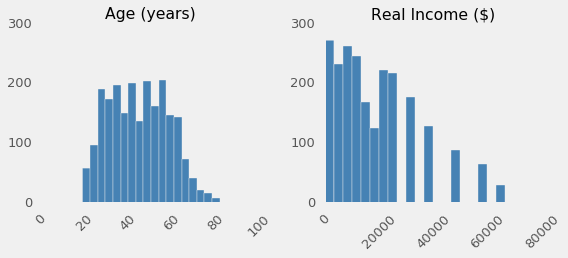

In [41]:
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45, color='SteelBlue')
ax1, ax2 = ax_list[0]
ax1.set_title('Age (years)')
ax2.set_title('Real Income ($)')
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=4)

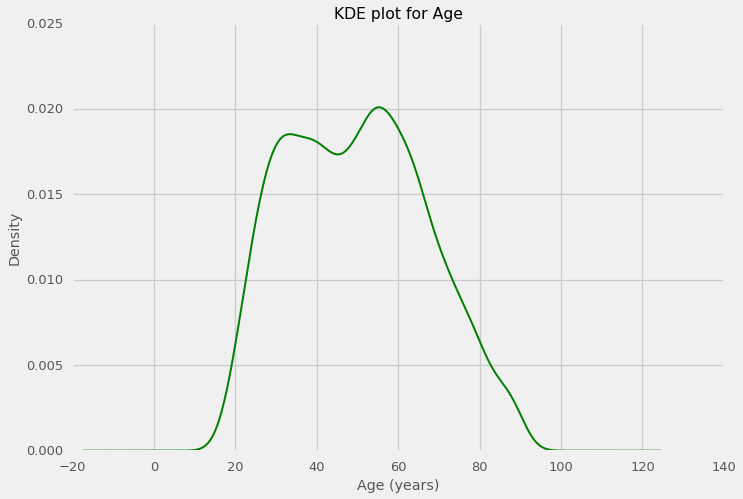

In [42]:
age = gss_data['age'].dropna()
age.plot(kind='kde', lw=2, color='green')
plt.title('KDE plot for Age')
plt.xlabel('Age (years)');

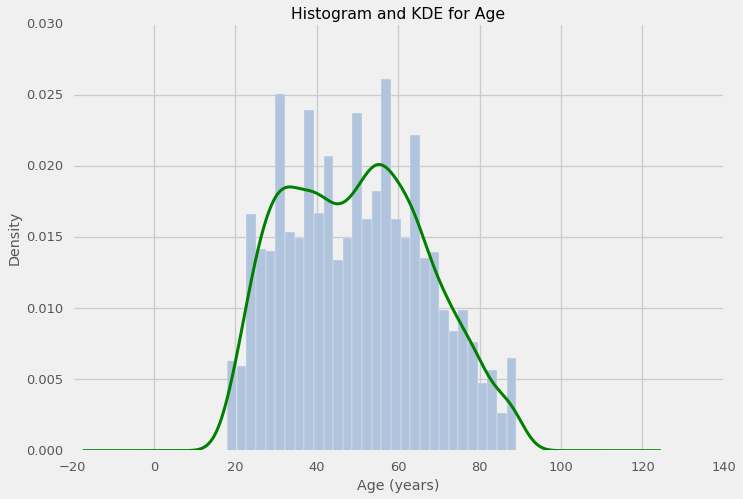

In [43]:
ax = age.hist(bins=30, color='LightSteelBlue', normed=True)
age.plot(kind='kde',lw=3,color='Green',ax=ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)');

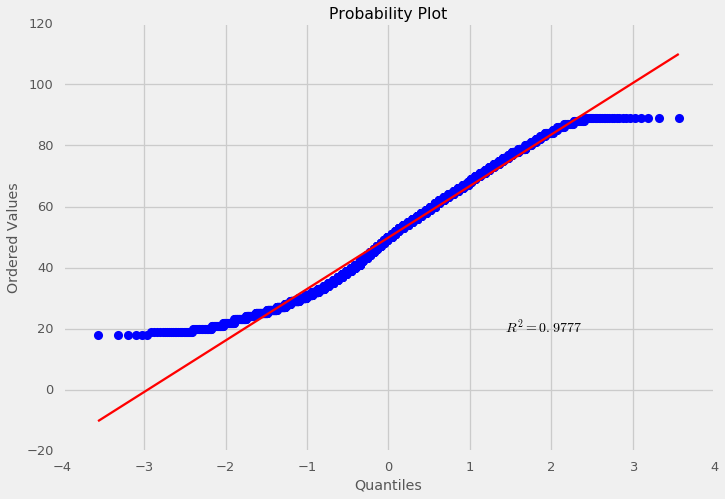

In [44]:
import scipy.stats as stats
stats.probplot(age, dist='norm', plot=plt);

In [45]:
inc = gss_data['realrinc'].dropna()
lowinc = inc[inc < 1.0E5]
lowinc.describe()

count     2252.000000
mean     19178.396203
std      14774.789813
min        236.500000
25%       7686.250000
50%      15372.500000
75%      26015.000000
max      66220.000000
Name: realrinc, dtype: float64

In [46]:
lowinc.describe(percentiles=np.arange(0,1.0,0.1))

count     2252.000000
mean     19178.396203
std      14774.789813
min        236.500000
0%         236.500000
10%       2601.500000
20%       6503.750000
30.0%    10051.250000
40%      13007.500000
50%      15372.500000
60.0%    21285.000000
70%      26015.000000
80%      31927.500000
90%      39022.500000
max      66220.000000
Name: realrinc, dtype: float64

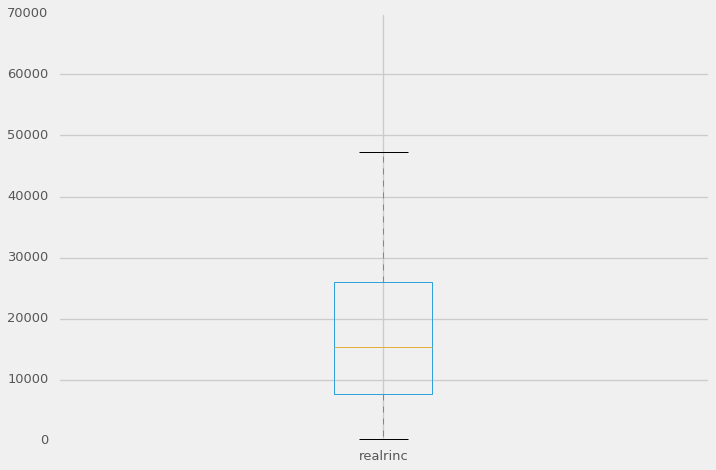

In [47]:
lowinc.plot(kind='box');

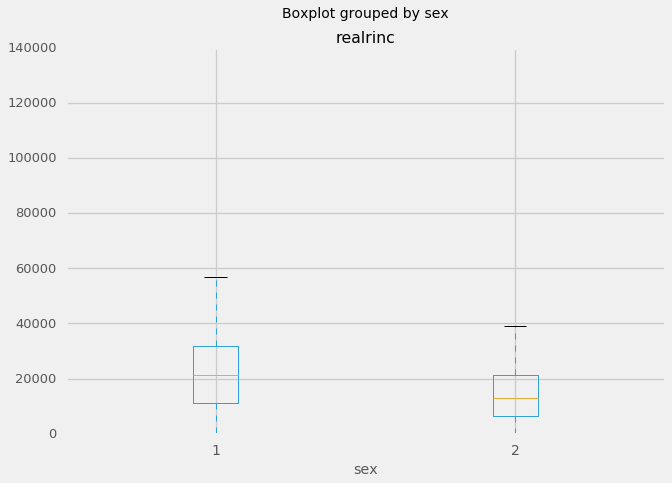

In [48]:
inc_gen = gss_data[['realrinc','sex']]
inc_gen.boxplot(column='realrinc',by='sex');

## Chapter 2

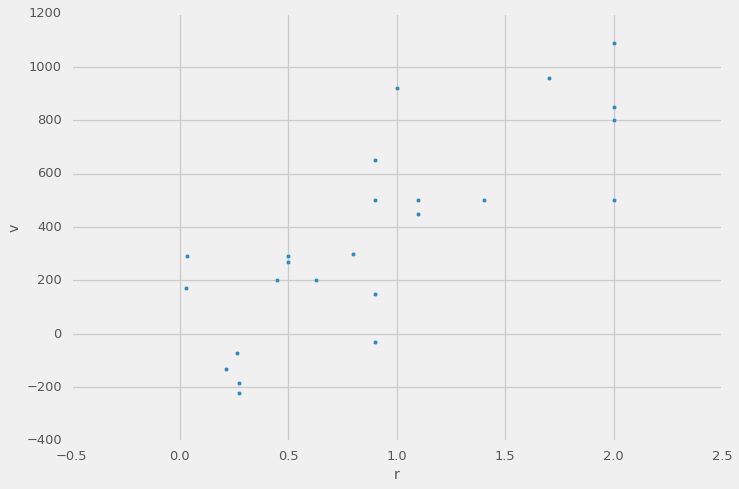

In [52]:
cols = ['id', 'r','v']
hubble_data = pd.read_csv('Chapter 2/data/hubble.csv',skiprows=2,
                         names=cols)
hubble_data.plot(kind='scatter', x='r', y='v');

In [54]:
hubble_data.head()

,id,r,v
0,SMC,0.032,170
1,5194,0.500,270
2,1055,1.100,450
3,LMC,0.034,290
4,4449,0.630,200


In [55]:
from scipy.stats import linregress
rv = hubble_data.as_matrix(columns=['r','v'])
a, b, r, p, stderr = linregress(rv)
print(a, b, r, p, stderr)

454.158440923 -40.7836490959 0.789639487935 4.47749100061e-06 75.2371053472


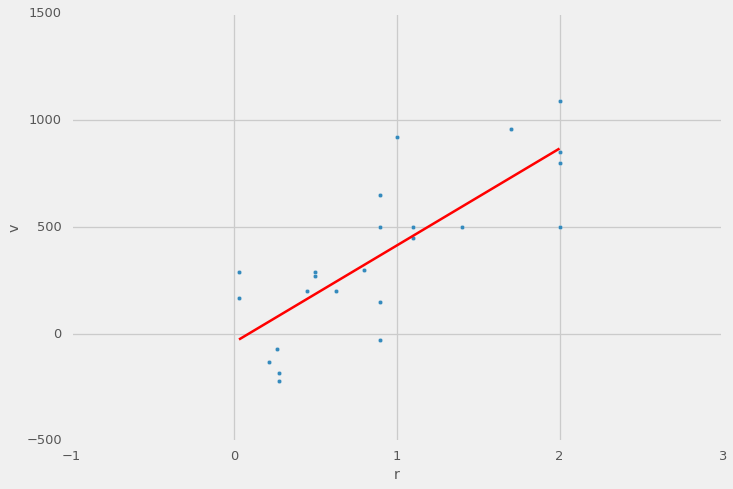

In [56]:
hubble_data.plot(kind='scatter', x='r', y='v')
rdata = hubble_data['r']
rmin, rmax = min(rdata), max(rdata)
rvalues = np.linspace(rmin, rmax, 200)
yvalues = a * rvalues + b
plt.plot(rvalues, yvalues, color='red', lw=2.5)
plt.locator_params(nbins=5);

## Chapter 3. Learning About Models



In [57]:
from pandas import Series, DataFrame
import numpy.random as rnd
import scipy.stats as st

In the previous chapter, when discussing visual representations of numerical data, we introduced histograms, which represent the way the data is distributed across a number of intervals. One of the drawbacks of histograms is that the number of bins is always chosen somewhat arbitrarily, and incorrect choices may give useless or misleading information about the distribution of the data.

We say that histograms abstract some of the characteristics of the data. That is, a histogram allows us to ignore some of the fine-grained variability in the data so that general patterns are more apparent.

Abstraction is, in general, a good thing when analyzing a dataset but we would like to have an accurate representation of all data points that is visually compelling and computationally useful. This is provided by the cumulative distribution function. This function has always been important for statistical computations, and cumulative distribution tables were in fact an essential tool before the advent of the computer. However, as a graphical tool, the cumulative distribution function is not usually emphasized in introductory statistics texts. In my opinion, this is partly due to a historical bias as it is unwieldy to draw a cumulative distribution function without the aid of a computer.

In [66]:
mean = 0
sdev = 1
nvalues = 10000
norm_variate = mean + sdev * rnd.randn(nvalues)
print(norm_variate)

# try https://www.random.org

[-0.03814108 -0.2902491  -1.39648414 ..., -0.16821181 -0.20728353
  1.77107798]


In [67]:
for i, v in enumerate(sorted(norm_variate), start=1):
    print('{0:2d} {1:+.4f}'.format(i, v))

 1 -4.0784
 2 -3.5085
 3 -3.2952
 4 -3.2707
 5 -3.1954
 6 -3.1735
 7 -3.1557
 8 -3.1462
 9 -3.1173
10 -3.1007
11 -3.0798
12 -3.0713
13 -3.0635
14 -3.0486
15 -3.0456
16 -3.0250
17 -3.0029
18 -2.9874
19 -2.9396
20 -2.9190
21 -2.9177
22 -2.9077
23 -2.9024
24 -2.8830
25 -2.8757
26 -2.8437
27 -2.8402
28 -2.8244
29 -2.8241
30 -2.7996
31 -2.7628
32 -2.7199
33 -2.7191
34 -2.7030
35 -2.6994
36 -2.6909
37 -2.6841
38 -2.6740
39 -2.6577
40 -2.6470
41 -2.6332
42 -2.6317
43 -2.5978
44 -2.5793
45 -2.5734
46 -2.5695
47 -2.5684
48 -2.5600
49 -2.5568
50 -2.5546
51 -2.5500
52 -2.5465
53 -2.5327
54 -2.5298
55 -2.5275
56 -2.5244
57 -2.5233
58 -2.5124
59 -2.5054
60 -2.5045
61 -2.4958
62 -2.4949
63 -2.4946
64 -2.4873
65 -2.4791
66 -2.4744
67 -2.4693
68 -2.4575
69 -2.4500
70 -2.4495
71 -2.4394
72 -2.4305
73 -2.4304
74 -2.4266
75 -2.4253
76 -2.4231
77 -2.4215
78 -2.4213
79 -2.4116
80 -2.4061
81 -2.4042
82 -2.3995
83 -2.3971
84 -2.3799
85 -2.3713
86 -2.3675
87 -2.3667
88 -2.3629
89 -2.3603
90 -2.3543
91 -2.3505

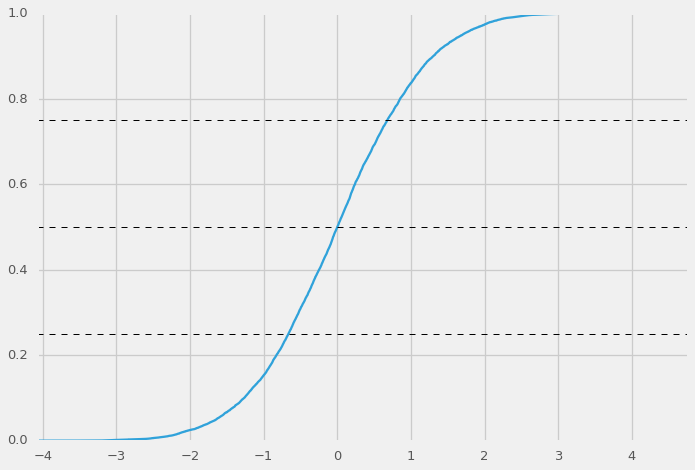

In [69]:
nvseries = pd.Series(norm_variate)
nvcdf = nvseries.value_counts(normalize=True).sort_index().cumsum()
nvcdf.plot()
for v in [0.25, 0.5, 0.75]:
    plt.axhline(v, lw=1, ls='--',color='black')

In [70]:
def plot_cdf(data, plot_range=None, scale_to=None, **kwargs):
    num_bins = len(data)
    sorted_data = np.array(sorted(data), dtype=np.float64)
    data_range = sorted_data[-1] - sorted_data[0]
    counts, bin_edges = np.histogram(sorted_data, bins=num_bins)
    xvalues = bin_edges[:1]
    yvalues = np.cumsum(counts)
    if plot_range is None:
        xmin = sorted_data[0]
        xmax = sorted_data[-1]
    else:
        xmin, xmax = plot_range
    # pad the arrays
    xvalues = np.concatenate([[xmin, xvalues[0]], xvalues, [xmax]])
    yvalues = np.concatenate([[0.0, 0.0], yvalues, [yvalues.max()]])
    if scale_to is None:
        yvalues = yvalues / len(data) * scale_to
    plt.axis([xmin, xmax, 0, yvalues.max()])
    return plt.plot(xvalues, yvalues, **kwargs)

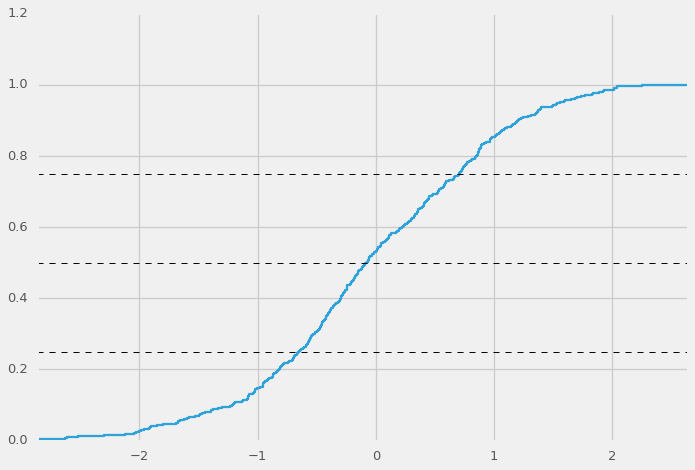

In [86]:
nvalues = 500
norm_variate = rnd.randn(nvalues)
nvseries = pd.Series(norm_variate)
nvcdf = nvseries.value_counts(normalize=True).sort_index().cumsum()
nvcdf.plot(drawstyle='steps')
for v in [0.25, 0.5, 0.75]:
    plt.axhline(v, lw=1, ls='--',color='black');

In [79]:
wing_lengths = np.fromfile('Chapter 3/data/housefly-wing-lengths.txt',
                          sep='\n', dtype=np.int64)
print(wing_lengths)

[36 37 38 38 39 39 40 40 40 40 41 41 41 41 41 41 42 42 42 42 42 42 42 43 43
 43 43 43 43 43 43 44 44 44 44 44 44 44 44 44 45 45 45 45 45 45 45 45 45 45
 46 46 46 46 46 46 46 46 46 46 47 47 47 47 47 47 47 47 47 48 48 48 48 48 48
 48 48 49 49 49 49 49 49 49 50 50 50 50 50 50 51 51 51 51 52 52 53 53 54 55]


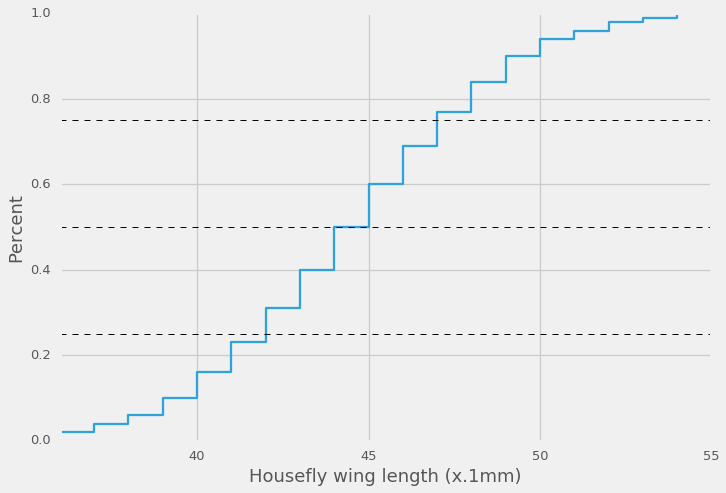

In [84]:
wlseries = pd.Series(wing_lengths)
wlcdf = wlseries.value_counts(normalize=True).sort_index().cumsum()
wlcdf.plot(drawstyle='steps')
for v in [0.25, 0.5, 0.75]:
    plt.axhline(v, lw=1, ls='--',color='black')
plt.xlabel('Housefly wing length (x.1mm)', fontsize=18)
plt.ylabel('Percent', fontsize=18);

In [87]:
import scipy.stats as st

In [88]:
N = 4857
mean = 63.8
serror = 0.06
sdev = serror * np.sqrt(N)
rvnorm = st.norm(loc=mean, scale=sdev)

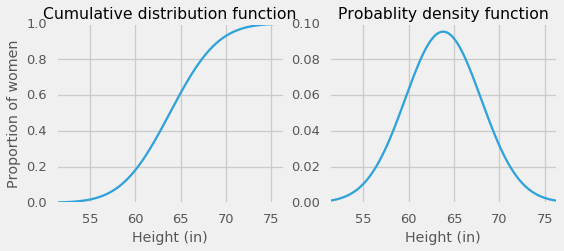

In [90]:
xmin = mean - 3*sdev
xmax = mean + 3*sdev
xx = np.linspace(xmin, xmax,1000)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(xx, rvnorm.cdf(xx))
plt.title('Cumulative distribution function')
plt.xlabel('Height (in)')
plt.ylabel('Proportion of women')
plt.axis([xmin, xmax, 0.0, 1.0])
plt.subplot(1,2,2)
plt.plot(xx, rvnorm.pdf(xx))
plt.title('Probablity density function')
plt.xlabel('Height (in)')
plt.axis([xmin, xmax, 0.0, .1]);

In [92]:
rvnorm.cdf(68) - rvnorm.cdf(63)

0.41827270560402535

In [94]:
categories = [
    ('Petite', 59, 63),
    ('Average', 63, 68),
    ('Tall', 68, 71),
]

for cat, vmin, vmax in categories:
    percent = 100*(rvnorm.cdf(vmax) - rvnorm.cdf(vmin))
    print('{:>8s}: {:.2f}'.format(cat, percent))

  Petite: 29.86
 Average: 41.83
    Tall: 11.50


In [95]:
too_short = 100*rvnorm.cdf(59)
too_tall = 100*(1 - rvnorm.cdf(71))
unclassified = too_short + too_tall
print(too_short, too_tall, unclassified)

12.5503898661 4.25476721471 16.8051570808


In [96]:
a = rvnorm.ppf(0.25)
b = rvnorm.ppf(0.75)
print(a,b)

60.9796003217 66.6203996783


In [97]:
mean, variance, skew, kurtosis = rvnorm.stats(moments='mvks')
print(mean, variance, skew, kurtosis)

63.8 17.485200000000003 0.0 0.0


In [99]:
eta = 1.0
beta = 1.5
rvweib = st.weibull_min(beta, scale=eta)

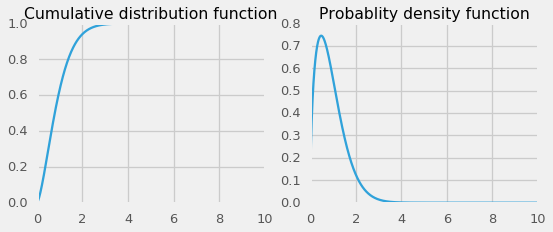

In [101]:
#xmin = mean - 3*sdev
#xmax = mean + 3*sdev
xx = np.linspace(0, 10,1000)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(xx, rvweib.cdf(xx))
plt.title('Cumulative distribution function')
#plt.xlabel('Height (in)')
#plt.ylabel('Proportion of women')
#plt.axis([xmin, xmax, 0.0, 1.0])
plt.subplot(1,2,2)
plt.plot(xx, rvweib.pdf(xx))
plt.title('Probablity density function')
#plt.xlabel('Height (in)')
#plt.axis([xmin, xmax, 0.0, 1.0]);

In [102]:
weib_variates = rvweib.rvs(size=500)
print(weib_variates[:10])

[ 1.12411839  0.26553112  0.74511127  1.32615942  0.66504029  0.06857243
  1.34992263  0.48387495  0.76411863  0.30406654]


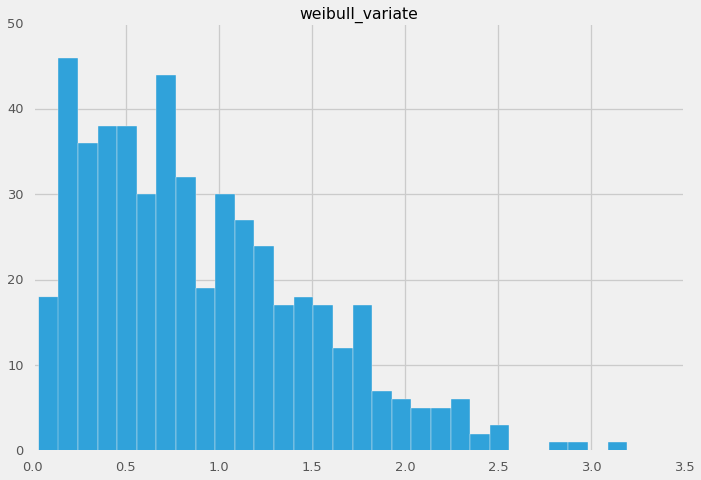

In [104]:
weib_df = pd.DataFrame(weib_variates, columns=['weibull_variate'])
weib_df.hist(bins=30);

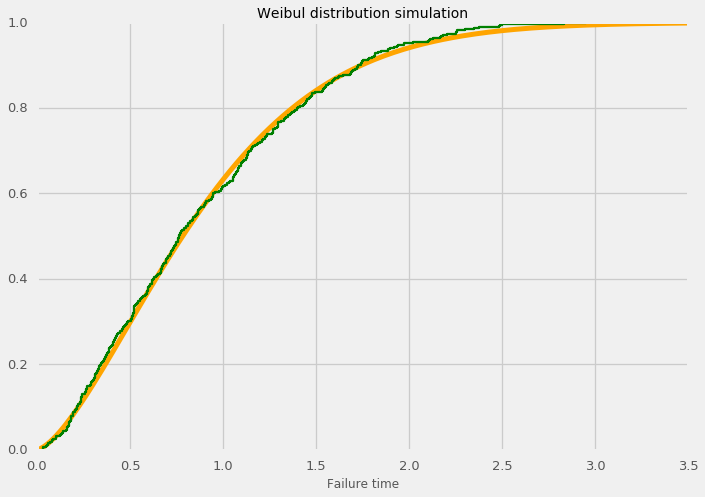

In [105]:
xmin = 0
xmax = 3.5
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, rvweib.cdf(xx), color='orange', lw=5)
weib_variates_series = pd.Series(weib_variates)
weib_variates_cdf = weib_variates_series.value_counts(normalize=True).sort_index().cumsum()
weib_variates_cdf.plot(drawstyle='steps',color='green')
plt.axis([xmin, xmax, 0, 1])
plt.title('Weibul distribution simulation', fontsize=14)
plt.xlabel('Failure time', fontsize=12);

In [106]:
wing_lengths = np.fromfile('Chapter 3/data/housefly-wing-lengths.txt',
                          sep='\n',dtype=np.int64)
mean, std = st.norm.fit(wing_lengths)
print(mean, std)

45.5 3.9


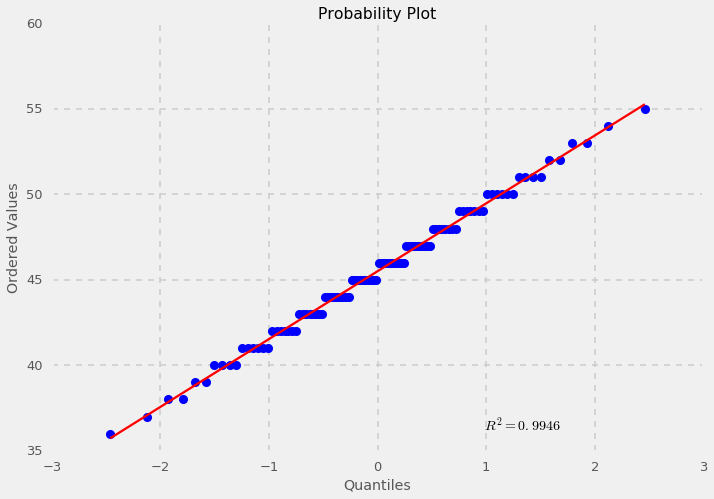

In [108]:
st.probplot(wing_lengths, dist='norm', plot=plt)
plt.grid(lw=1.5, ls='dashed')

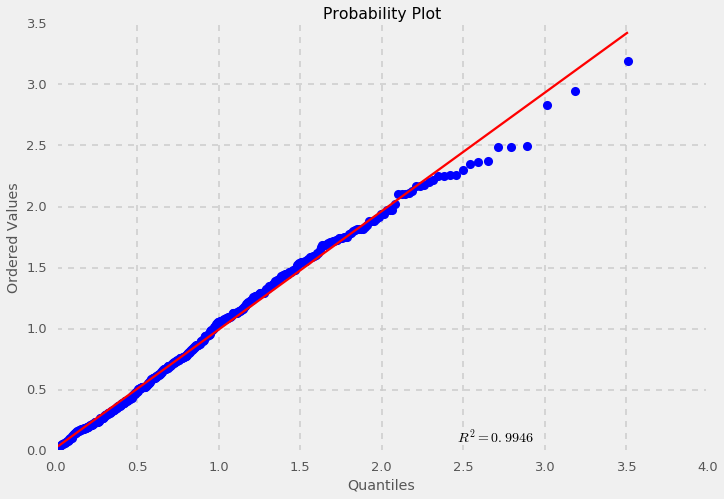

In [116]:
st.probplot(weib_variates, dist=stats.weibull_min(beta,scale=eta), plot=plt)
plt.grid(lw=1.5, ls='dashed')

In [117]:
N = 20
p = 0.5
rv_binom = st.binom(N,p)

In [118]:
rv_binom.pmf(12)

0.12013435363769531

In [119]:
rv_binom.cdf(7)

0.13158798217773435

[0, 20, 0, 0.18]

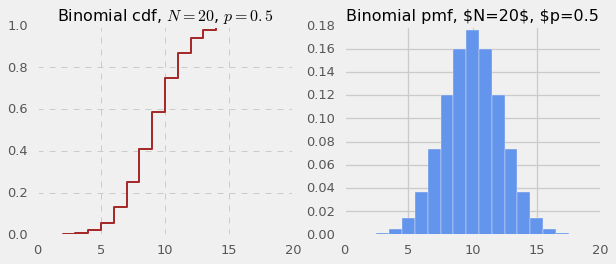

In [120]:
xx = np.arange(N+1)
cdf = rv_binom.cdf(xx)
pmf = rv_binom.pmf(xx)
xvalues = np.arange(N+1)
plt.figure(figsize=(9,3.5))
plt.subplot(1,2,1)
plt.step(xvalues, cdf, lw=2, color='brown')
plt.grid(lw=1, ls='dashed')
plt.title('Binomial cdf, $N=20$, $p=0.5$', fontsize=16)
plt.subplot(1,2,2)
left = xx - 0.5
plt.bar(left, pmf, 1.0, color='CornflowerBlue')
plt.title('Binomial pmf, $N=20$, $p=0.5', fontsize=16)
plt.axis([0, 20, 0, .18])